### (c) Adaptions

In the previous sections, the models were learned on log airbnb prices. The question is whether we can increase the prediction accuracy if we directly use airbnb prices. An other adaption is to use cross-validation instead of a validation set. The adaptions are tested only on Random Forest and XGBoost, the two best models from the previous part.

#### Airbnb price instead of log airbnb price

The idea is to use airbnb prices instead of log airbnb prices. From Statistics we know that a random variable $X$ is said to follow a log-normal distribution if:

$$ X = e^{\mu + \sigma Z} $$

where $Z$ is standard normally distributed and $\mu$ and $\sigma$ are the mean and the standard deviation on the log-transformed values. The definition also holds for other bases since it holds:

$$ ln(x) = \frac{log_{10}(x)}{log_{10}(e)} $$

and thus:

\begin{align}
\mu^{\ast} & = \int log_{10}(x) f(x) dx = log_{10}(e) \int ln(x) f(x) dx = log_{10}(e) \mu \\
\sigma^{\ast} & = \Big(\int (log_{10}(x)-\mu^{\ast})^2 f(x) dx \Big)^{0.5} = log_{10}(e) \Big( \int (ln(x)-\mu)^2 f(x) dx \Big)^{0.5} = log_{10}(e) \sigma
\end{align}        

Finally, we get:

$$ X = e^{\mu + \sigma Z} = e^{1/log_{10}(e)(\mu^{\ast} + \sigma^{\ast} Z)} = 10^{\mu^{\ast} + \sigma^{\ast} Z} $$

because:

$$ \Big(e^{1/log_{10}(e)}\Big)^{log_{10}(e)} = e = 10^{log_{10}(e)}$$.

A well-known result is that the mean is:

$$ E[X] = e^{\mu + \frac{1}{2}\sigma^2}$$

The median is:

$$ Med[X] = e^{\mu} = 10^{\mu^{\ast}} $$

because of $\mu^{\ast} = log_{10}(e) \mu$. We use the last result to transform the means of the log prices of the constructed aggregations to get the medians. The so transformed features are then used to directly model airbnb prices.

We now implement the adaptions on our datasets.

In [398]:
# Remark: ut stands for untransformed

# Train
#######

# Suburb
train_suburb_ut = train_suburb.copy()
train_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    train_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
train_suburb_ut['Air_log_price'] = train_suburb.Air_log_price.apply(lambda x: 10**x)
train_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
train_500m_ut = train_500m.copy()
train_500m_ut['Air_log_price_500m_same_room_type'] = \
    train_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
train_500m_ut['Air_log_price'] = train_500m.Air_log_price.apply(lambda x: 10**x)
train_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
train_100m_ut = train_100m.copy()
train_100m_ut['Air_log_price_100m_same_room_type'] = \
    train_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
train_100m_ut['Air_log_price'] = train_100m.Air_log_price.apply(lambda x: 10**x)
train_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
train_50m_ut = train_50m.copy()
train_50m_ut['Air_log_price_50m_same_room_type'] = \
    train_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
train_50m_ut['Air_log_price'] = train_50m.Air_log_price.apply(lambda x: 10**x)
train_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
train_base_ut = train_base.copy()
train_base_ut['Air_log_price'] = train_base.Air_log_price.apply(lambda x: 10**x)
train_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

# Validation
############

# Suburb
valid_suburb_ut = valid_suburb.copy()
valid_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    valid_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
valid_suburb_ut['Air_log_price'] = valid_suburb.Air_log_price.apply(lambda x: 10**x)
valid_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
valid_500m_ut = valid_500m.copy()
valid_500m_ut['Air_log_price_500m_same_room_type'] = \
    valid_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
valid_500m_ut['Air_log_price'] = valid_500m.Air_log_price.apply(lambda x: 10**x)
valid_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
valid_100m_ut = valid_100m.copy()
valid_100m_ut['Air_log_price_100m_same_room_type'] = \
    valid_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
valid_100m_ut['Air_log_price'] = valid_100m.Air_log_price.apply(lambda x: 10**x)
valid_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
valid_50m_ut = valid_50m.copy()
valid_50m_ut['Air_log_price_50m_same_room_type'] = \
    valid_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
valid_50m_ut['Air_log_price'] = valid_50m.Air_log_price.apply(lambda x: 10**x)
valid_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
valid_base_ut = valid_base.copy()
valid_base_ut['Air_log_price'] = valid_base.Air_log_price.apply(lambda x: 10**x)
valid_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

# Test
######

# Suburb
test_suburb_ut = test_suburb.copy()
test_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    test_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
test_suburb_ut['Air_log_price'] = test_suburb.Air_log_price.apply(lambda x: 10**x)
test_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
test_500m_ut = test_500m.copy()
test_500m_ut['Air_log_price_500m_same_room_type'] = \
    test_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
test_500m_ut['Air_log_price'] = test_500m.Air_log_price.apply(lambda x: 10**x)
test_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
test_100m_ut = test_100m.copy()
test_100m_ut['Air_log_price_100m_same_room_type'] = \
    test_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
test_100m_ut['Air_log_price'] = test_100m.Air_log_price.apply(lambda x: 10**x)
test_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
test_50m_ut = test_50m.copy()
test_50m_ut['Air_log_price_50m_same_room_type'] = \
    test_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
test_50m_ut['Air_log_price'] = test_50m.Air_log_price.apply(lambda x: 10**x)
test_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
test_base_ut = test_base.copy()
test_base_ut['Air_log_price'] = test_base.Air_log_price.apply(lambda x: 10**x)
test_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

In [399]:
# Suburb
X_train_suburb_ut = train_suburb_ut.loc[:, ~train_suburb_ut.columns.isin(['Air_price'])].values
y_train_suburb_ut = train_suburb_ut.loc[:, 'Air_price'].values

X_valid_suburb_ut = valid_suburb_ut.loc[:, ~valid_suburb_ut.columns.isin(['Air_price'])].values
y_valid_suburb_ut = valid_suburb_ut.loc[:, 'Air_price'].values

X_test_suburb_ut = test_suburb_ut.loc[:, ~test_suburb_ut.columns.isin(['Air_price'])].values
y_test_suburb_ut = test_suburb_ut.loc[:, 'Air_price'].values

# 500m
X_train_500m_ut = train_500m_ut.loc[:, ~train_500m_ut.columns.isin(['Air_price'])].values
y_train_500m_ut = train_500m_ut.loc[:, 'Air_price'].values

X_valid_500m_ut = valid_500m_ut.loc[:, ~valid_500m_ut.columns.isin(['Air_price'])].values
y_valid_500m_ut = valid_500m_ut.loc[:, 'Air_price'].values

X_test_500m_ut = test_500m_ut.loc[:, ~test_500m_ut.columns.isin(['Air_price'])].values
y_test_500m_ut = test_500m_ut.loc[:, 'Air_price'].values

# 100m
X_train_100m_ut = train_100m_ut.loc[:, ~train_100m_ut.columns.isin(['Air_price'])].values
y_train_100m_ut = train_100m_ut.loc[:, 'Air_price'].values

X_valid_100m_ut = valid_100m_ut.loc[:, ~valid_100m_ut.columns.isin(['Air_price'])].values
y_valid_100m_ut = valid_100m_ut.loc[:, 'Air_price'].values

X_test_100m_ut = test_100m_ut.loc[:, ~test_100m_ut.columns.isin(['Air_price'])].values
y_test_100m_ut = test_100m_ut.loc[:, 'Air_price'].values

# 50m
X_train_50m_ut = train_50m_ut.loc[:, ~train_50m_ut.columns.isin(['Air_price'])].values
y_train_50m_ut = train_50m_ut.loc[:, 'Air_price'].values

X_valid_50m_ut = valid_50m_ut.loc[:, ~valid_50m_ut.columns.isin(['Air_price'])].values
y_valid_50m_ut = valid_50m_ut.loc[:, 'Air_price'].values

X_test_50m_ut = test_50m_ut.loc[:, ~test_50m_ut.columns.isin(['Air_price'])].values
y_test_50m_ut = test_50m_ut.loc[:, 'Air_price'].values

# baseline
X_train_base_ut = train_base_ut.loc[:, ~train_base_ut.columns.isin(['Air_price'])].values
y_train_base_ut = train_base_ut.loc[:, 'Air_price'].values

X_valid_base_ut = valid_base_ut.loc[:, ~valid_base_ut.columns.isin(['Air_price'])].values
y_valid_base_ut = valid_base_ut.loc[:, 'Air_price'].values

X_test_base_ut = test_base_ut.loc[:, ~test_base_ut.columns.isin(['Air_price'])].values
y_test_base_ut = test_base_ut.loc[:, 'Air_price'].values

Next, we estimate the models and plot the results. 
<!--- The prices are falsely labeled as log prices in the plots. --->

*Aggregation by suburbs*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.66 / RMSE train 50.53 / MAE train 32.44 / Nobs: 14261
R2 test: 0.59 / RMSE test 55.05 / MAE test 36.17 / Nobs: 4451


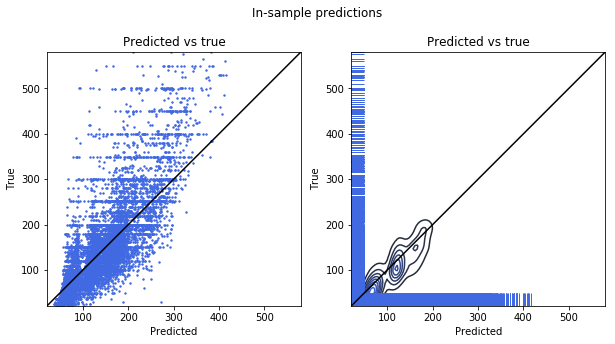

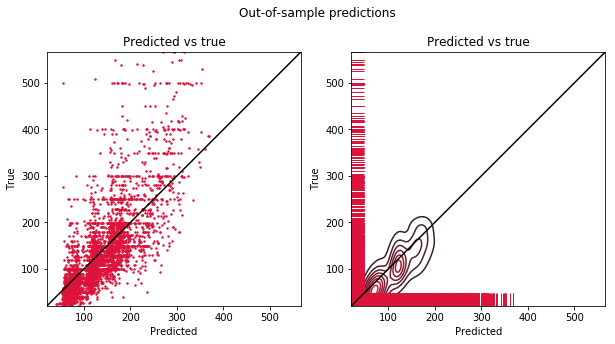

In [400]:
train_tpl = (X_train_suburb_ut, y_train_suburb_ut)
test_tpl = (X_test_suburb_ut, y_test_suburb_ut)
rf_suburb_ut = print_results('RF_suburbs_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.69 / RMSE train 48.10 / MAE train 31.28 / Nobs: 14261
R2 test: 0.56 / RMSE test 56.52 / MAE test 36.76 / Nobs: 4451


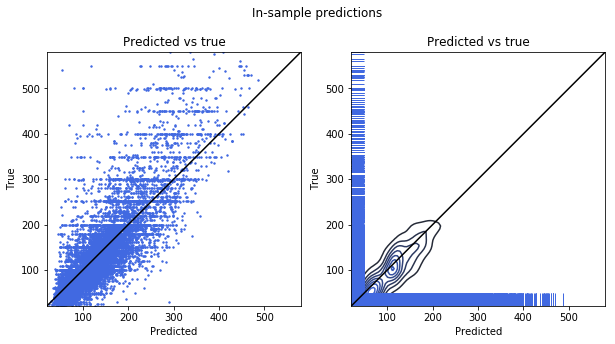

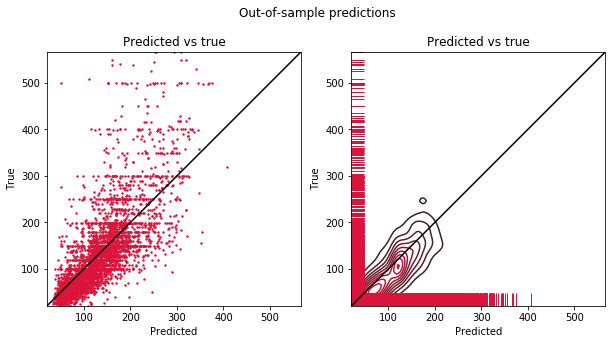

In [401]:
train_tpl = (X_train_suburb_ut, y_train_suburb_ut)
test_tpl = (X_test_suburb_ut, y_test_suburb_ut)
xgb_suburb_ut = print_results('XGB_suburbs_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 500m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.78 / RMSE train 40.16 / MAE train 25.46 / Nobs: 13230
R2 test: 0.63 / RMSE test 52.38 / MAE test 33.17 / Nobs: 3739


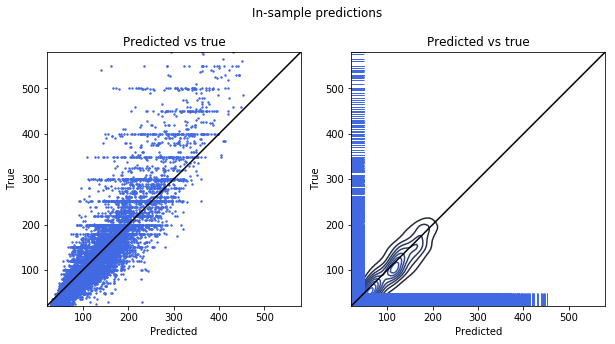

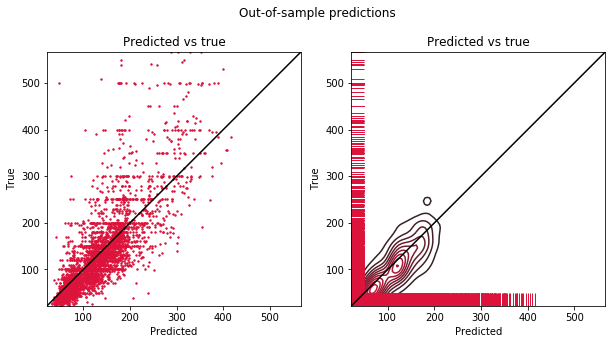

In [402]:
train_tpl = (X_train_500m_ut, y_train_500m_ut)
test_tpl = (X_test_500m_ut, y_test_500m_ut)
rf_500m_ut = print_results('RF_500m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 41.13 / MAE train 26.87 / Nobs: 13230
R2 test: 0.65 / RMSE test 50.94 / MAE test 32.48 / Nobs: 3739


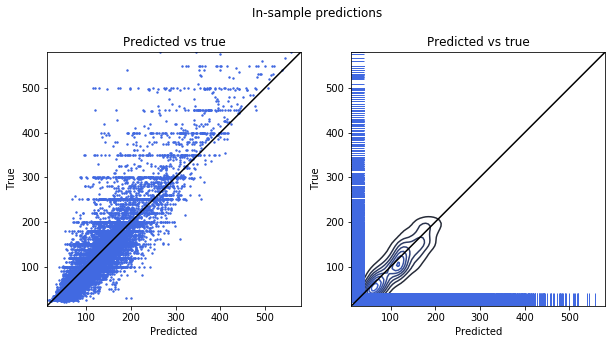

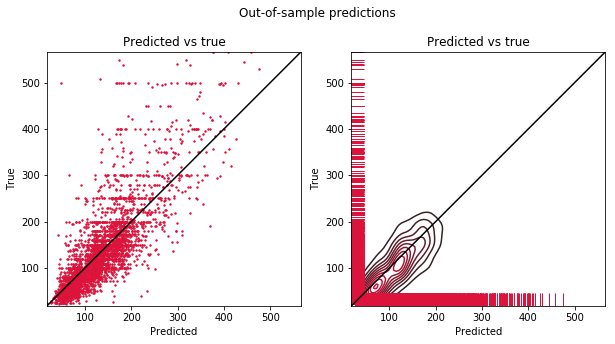

In [403]:
train_tpl = (X_train_500m_ut, y_train_500m_ut)
test_tpl = (X_test_500m_ut, y_test_500m_ut)
xgb_500m_ut = print_results('XGB_500m_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 100m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.75 / RMSE train 41.09 / MAE train 26.73 / Nobs: 9203
R2 test: 0.61 / RMSE test 48.18 / MAE test 31.39 / Nobs: 2177


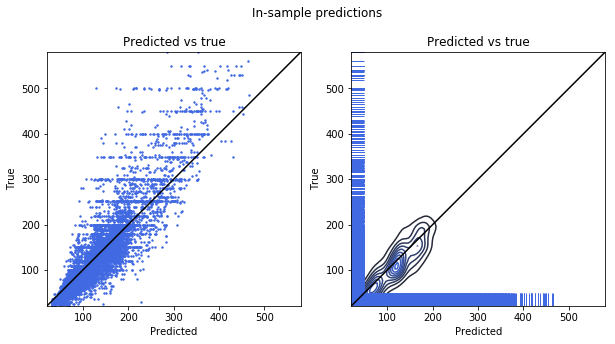

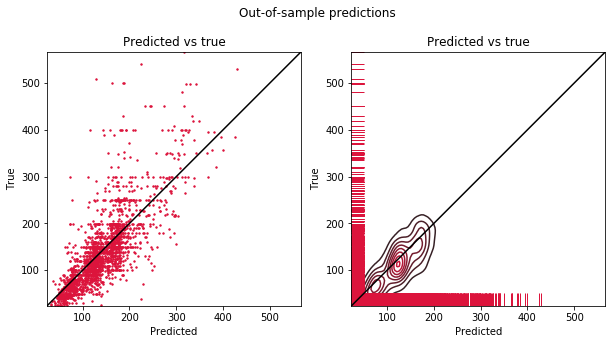

In [404]:
train_tpl = (X_train_100m_ut, y_train_100m_ut)
test_tpl = (X_test_100m_ut, y_test_100m_ut)
rf_100m_ut = print_results('RF_100m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.78 / RMSE train 39.12 / MAE train 25.46 / Nobs: 9203
R2 test: 0.63 / RMSE test 47.22 / MAE test 30.72 / Nobs: 2177


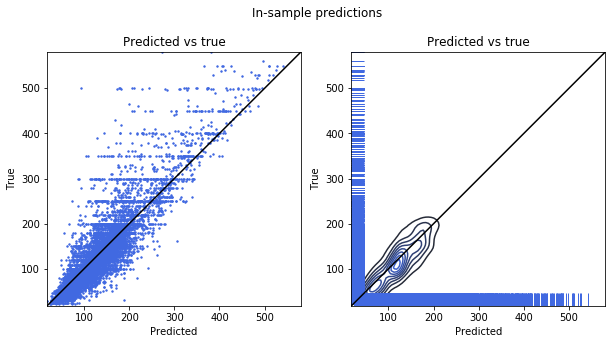

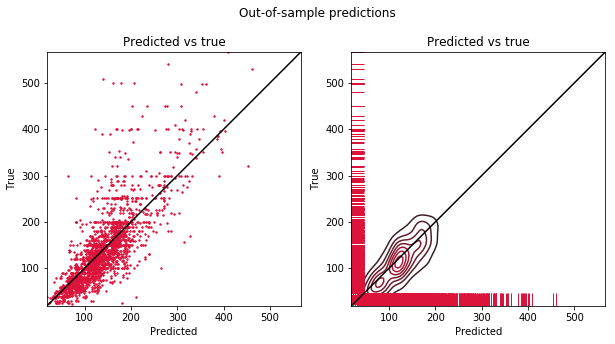

In [405]:
train_tpl = (X_train_100m_ut, y_train_100m_ut)
test_tpl = (X_test_100m_ut, y_test_100m_ut)
xgb_100m_ut = print_results('XGB_100m_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 50m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.73 / RMSE train 42.35 / MAE train 27.61 / Nobs: 6522
R2 test: 0.60 / RMSE test 46.35 / MAE test 30.69 / Nobs: 1340


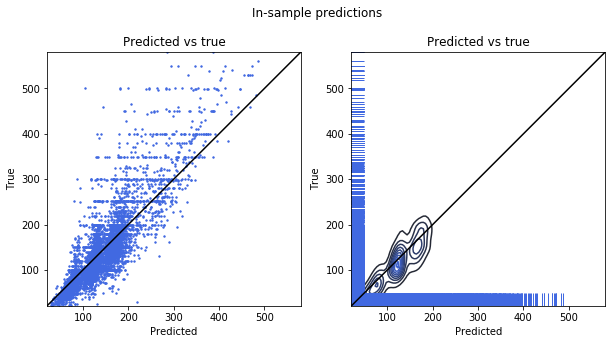

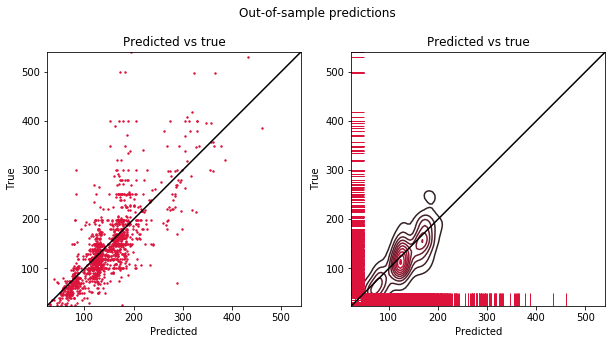

In [406]:
train_tpl = (X_train_50m_ut, y_train_50m_ut)
test_tpl = (X_test_50m_ut, y_test_50m_ut)
rf_50m_ut = print_results('RF_50m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 36.55 / MAE train 23.37 / Nobs: 6522
R2 test: 0.61 / RMSE test 45.51 / MAE test 30.27 / Nobs: 1340


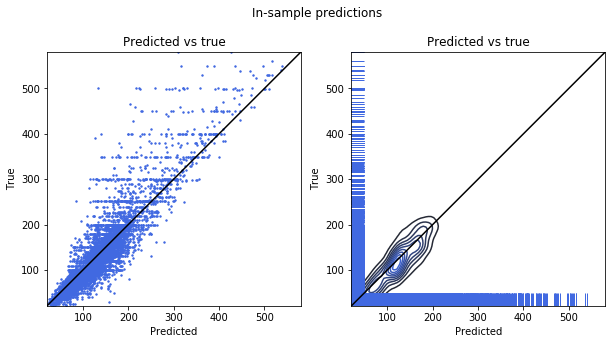

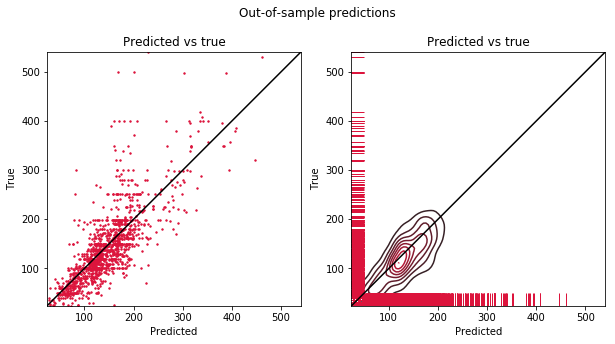

In [407]:
train_tpl = (X_train_50m_ut, y_train_50m_ut)
test_tpl = (X_test_50m_ut, y_test_50m_ut)
xgb_50m_ut = print_results('XGB_50m_ut.p', test_tpl, train_tpl, None, True)

The following plot summarizes the results. To directly estimate the models with untransformed airbnb prices slightly improves the predictions. The code for the plots is adapted from https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

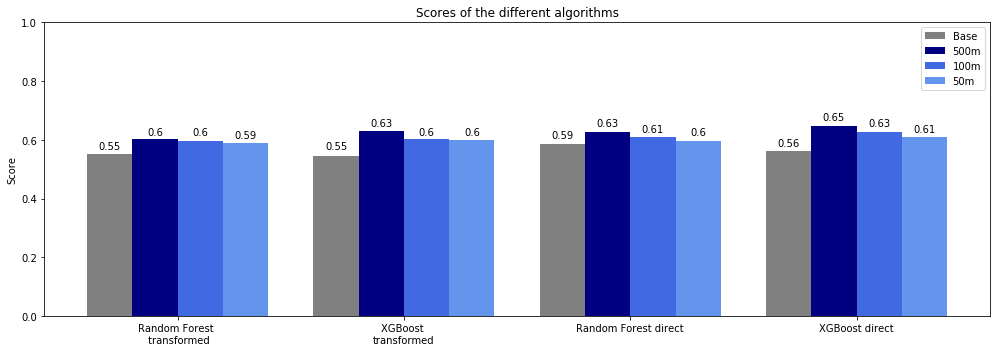

In [408]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

scores_suburb = [rf_suburb['test_r2_transformed'],
                 xgb_suburb['test_r2_transformed'],
                 rf_suburb_ut['test_r2'],
                 xgb_suburb_ut['test_r2']]

scores_500m = [rf_500m['test_r2_transformed'],
               xgb_500m['test_r2_transformed'],
               rf_500m_ut['test_r2'],
               xgb_500m_ut['test_r2']]

scores_100m = [rf_100m['test_r2_transformed'],
               xgb_100m['test_r2_transformed'],
               rf_100m_ut['test_r2'],
               xgb_100m_ut['test_r2']]

scores_50m = [rf_50m['test_r2_transformed'],
               xgb_50m['test_r2_transformed'],
               rf_50m_ut['test_r2'],
               xgb_50m_ut['test_r2']]


labels = ['Random Forest \n transformed', 'XGBoost \ntransformed', 'Random Forest direct', 'XGBoost direct']

factor = 1.5
x = np.arange(len(labels))*factor  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))
rects1 = ax.bar(x - 1.5*width, scores_suburb, width, label='Base', color='grey')
rects2 = ax.bar(x - 0.5*width, scores_500m, width, label='500m', color='navy')
rects3 = ax.bar(x + 0.5*width, scores_100m, width, label='100m', color='royalblue')
rects4 = ax.bar(x + 1.5*width, scores_50m, width, label='50m', color='cornflowerblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of the different algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.0,1])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()